In [2]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter

# initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
### Read our train data into a dataframe
texts = pd.read_csv("raw_data/train_full.csv", encoding = 'latin-1')

In [20]:
# split the data by author
byAuthor = texts.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
   
    # convert everything to lower case (so "The" and "the" get counted as 

#the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)

In [22]:
# create empty dictionary to populate with word lengths by author 
wordlengthByAuthor_all = {}

# for each author...
for key, value in token_dict.items():
    
    # characterizing words by different lengths
    word_len = [len(w) for w in value]
    wordlengthByAuthor_all[key] = word_len

In [12]:
# make a copy of texts to work with
texts_len = texts.copy()

# add the sentence length for each row
texts_len['sentence_len'] = [len(str.split(s)) for s in texts['text']]

# create column to populate with the unique words used in each sentence
texts_len['vocab'] = [len(set(str.split(s))) for s in texts_len['text']]

texts_len.head()

,id,text,author,sentence_len,vocab
0,id26305,"This process, however, afforded me no means of...",EAP,41,35
1,id17569,It never once occurred to me that the fumbling...,HPL,14,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36,32
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34,32
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27,25


In [14]:
# get summary data for each author on the sentence length
sentence_summary = pd.DataFrame(texts_len.groupby('author')['sentence_len'].describe())
sentence_summary

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
EAP,7900.0,25.442405,18.567706,2.0,12.0,21.0,33.0,267.0
HPL,5635.0,27.800000,14.123068,4.0,18.0,26.0,35.0,147.0
MWS,6044.0,27.417273,23.134440,2.0,15.0,23.0,34.0,861.0


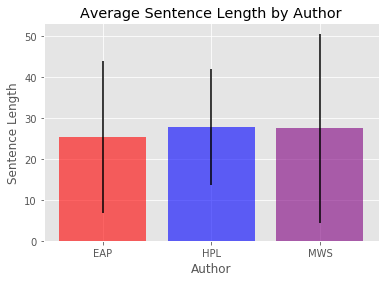

In [15]:
# plot

plt.bar(np.arange(3), sentence_summary['mean'], yerr=sentence_summary['std'], color = ['red', 'blue', 'purple'], alpha = 0.6)
plt.xticks(np.arange(3), sentence_summary.index)
plt.title("Average Sentence Length by Author")
plt.xlabel("Author")
plt.ylabel("Sentence Length")
plt.show()

## ANOVA analyses

### Sentence length

In [18]:
grps = pd.unique(texts_len.author.values)
sent_len = {grp:texts_len['sentence_len'][texts_len.author == grp] for grp in grps}

from scipy import stats
 
F, p = stats.f_oneway(sent_len['EAP'], sent_len['HPL'], sent_len['MWS'])

print(F)
print(p)

30.9674389627
3.73458578111e-14


### Word variety

In [19]:
vocab = {grp:texts_len['vocab'][texts_len.author == grp] for grp in grps}

F, p = stats.f_oneway(vocab['EAP'], vocab['HPL'], vocab['MWS'])

print(F)
print(p)

63.161650934
4.54328013189e-28


### Word length

In [23]:
F, p = stats.f_oneway(wordlengthByAuthor_all['EAP'], wordlengthByAuthor_all['HPL'], wordlengthByAuthor_all['MWS'])

print(F)
print(p)

252.419132228
2.64391611323e-110
